In [1]:
# import the necessary packages 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import gridspec 

In [2]:
data = pd.read_csv("creditcard.csv") 

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
print(data.shape) 
print(data.describe()) 

(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271

In [5]:
# Determine number of fraud cases in dataset 
fraud = data[data['Class'] == 1] 
valid = data[data['Class'] == 0] 
outlierFraction = len(fraud)/float(len(valid)) 
print(outlierFraction) 
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1]))) 
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0]))) 

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


In [7]:
print('Amount details of the fraudulent transaction') 
fraud.Amount.describe() 

Amount details of the fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [9]:
print("details of valid transaction") 
valid.Amount.describe() 

details of valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

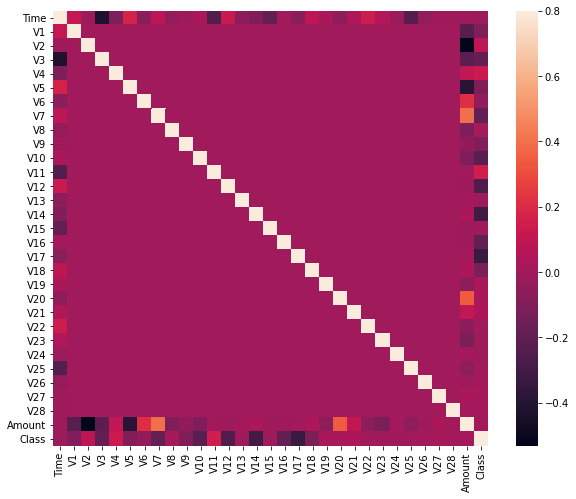

In [83]:
# Correlation matrix 
corrmat = data.corr() 
fig = plt.figure(figsize = (10, 8)) 
sns.heatmap(corrmat, vmax = .8, square = True) 
plt.show() 

In [11]:
# dividing the X and the Y from the dataset 
X = data.drop(['Class'], axis = 1) 
Y = data["Class"] 
print(X.shape) 
print(Y.shape) 
# getting just the values for the sake of processing  
# (its a numpy array with no columns) 
xData = X.values 
yData = Y.values 

(284807, 30)
(284807,)


In [12]:
# Using Skicit-learn to split data into training and testing sets 
from sklearn.model_selection import train_test_split 
# Split the data into training and testing sets 
xTrain, xTest, yTrain, yTest = train_test_split( 
        xData, yData, test_size = 0.2, random_state = 42) 

In [29]:
#Building the Logistic regression classifier
from sklearn.linear_model import LogisticRegression
clf_LR=LogisticRegression(max_iter=1000)
clf_LR.fit(xTrain, yTrain)

LogisticRegression(max_iter=1000)

In [38]:
#Building the Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
clf_NB=GaussianNB()
clf_NB.fit(xTrain, yTrain)

GaussianNB()

In [45]:
#Building the KNN classifier
from sklearn.neighbors import KNeighborsClassifier
clf_KNN= KNeighborsClassifier()
clf_KNN.fit(xTrain, yTrain)

KNeighborsClassifier()

In [66]:
#Building the SVM classifier
from sklearn.svm import SVC
clf_svm= SVC(kernel='linear').fit(xTrain, yTrain)

In [21]:
# Building the Random Forest Classifier (RANDOM FOREST) 
from sklearn.ensemble import RandomForestClassifier 
# random forest model creation 
rfc = RandomForestClassifier() 
rfc.fit(xTrain, yTrain) 

In [75]:
from keras.models import Sequential
from keras.layers import Dense
model= Sequential()
model.add(Dense(units=32, activation='relu', input_dim=30))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['acc'])

model.fit(xTrain, yTrain, epochs = 35, validation_split=0.2, batch_size= 128)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 182276 samples, validate on 45569 samples
Epoch 1/35
182276/182276 [==============================] - 4s 23us/step - loss: 50.1173 - acc: 0.9885 - val_loss: 3.0684 - val_acc: 0.9981
Epoch 2/35
182276/182276 [==============================] - 3s 19us/step - loss: 3.8391 - acc: 0.9964 - val_loss: 0.2629 - val_acc: 0.9964
Epoch 3/35
182276/182276 [==============================] - 3s 18us/step - loss: 3.4505 - acc: 0.9962 - val_loss: 2.6573 - val_acc: 0.9981
Epoch 4/35
182276/182276 [==============================] - 3s 19us/step - loss: 5.2030 - acc: 0.9964 - val_loss: 5.9565 - val_acc: 0.9981
Epoch 5/35
182276/182276 [==============================] - 3s 19us/step - loss: 1.5522 - acc: 0.9965 - val_loss: 0.1884 - val_acc: 0.9980
Epoch 6/35
182276/182276 [==============================] - 4s 19us/step - loss: 5.3871 - acc: 0.9967 - val_loss: 4.7202 - val_acc: 0.9981
Epoch 7/35
182276/1

In [76]:
# predictions 
yPred_RF = rfc.predict(xTest)
yPred_NB = clf_NB.predict(xTest)
yPred_KNN= clf_KNN.predict(xTest)
yPred_SVM= clf_svm.predict(xTest)
yPred_ANN= model.predict(xTest)
yPred_LR= clf_LR.predict(xTest)

In [79]:
yPred_ANN=yPred_ANN.round()
print(yPred_ANN)

[[1.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


The model used is Logistic Regression classifier
The accuracy is 0.9989115550718023
The precision is 0.7903225806451613
The recall is 0.5


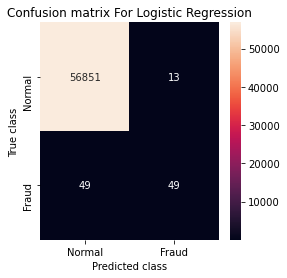


The model used is Naive Bayes classifier
The accuracy is 0.9930128857835048
The precision is 0.14622641509433962
The recall is 0.6326530612244898


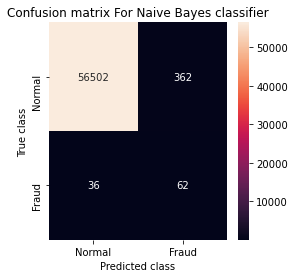


The model used is KNN classifier
The accuracy is 0.9983673326077034
The precision is 1.0
The recall is 0.05102040816326531


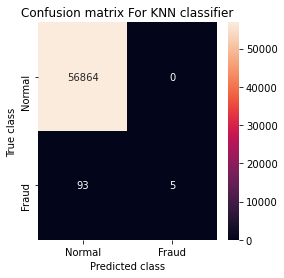


The model used is SVM classifier
The accuracy is 0.9984551104244935
The precision is 0.6041666666666666
The recall is 0.29591836734693877


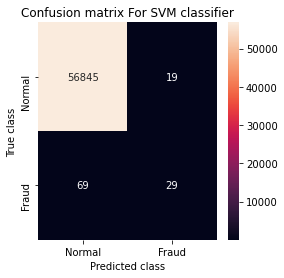


The model used is Random Forest classifier
The accuracy is 0.9996137776061234
The precision is 0.975
The recall is 0.7959183673469388


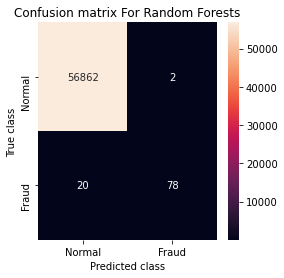


The model used is ANN
The accuracy is 0.9988939995084443
The precision is 0.7966101694915254
The recall is 0.47959183673469385


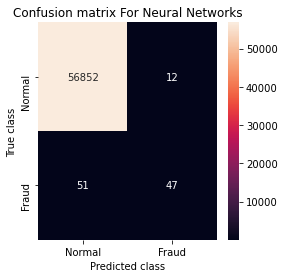

In [84]:
# Evaluating the classifier 
# printing every score of the classifier 
# scoring in anything 
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 

print("The model used is Logistic Regression classifier") 
  
acc = accuracy_score(yTest, yPred_LR) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(yTest, yPred_LR) 
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred_LR)
print("The recall is {}".format(rec)) 

LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(yTest, yPred_LR) 
plt.figure(figsize =(4, 4)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix For Logistic Regression") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

print("")

print("The model used is Naive Bayes classifier") 
  
acc = accuracy_score(yTest, yPred_NB) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(yTest, yPred_NB) 
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred_NB) 
print("The recall is {}".format(rec)) 

LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(yTest, yPred_NB) 
plt.figure(figsize =(4, 4)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix For Naive Bayes classifier") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

print("")

print("The model used is KNN classifier") 
  
acc = accuracy_score(yTest, yPred_KNN) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(yTest, yPred_KNN) 
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred_KNN) 
print("The recall is {}".format(rec)) 

LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(yTest, yPred_KNN) 
plt.figure(figsize =(4, 4)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix For KNN classifier") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

print("")

print("The model used is SVM classifier") 
  
acc = accuracy_score(yTest, yPred_SVM) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(yTest, yPred_SVM) 
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred_SVM) 
print("The recall is {}".format(rec))

LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(yTest, yPred_SVM) 
plt.figure(figsize =(4, 4)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix For SVM classifier") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

print("")

print("The model used is Random Forest classifier") 
  
acc = accuracy_score(yTest, yPred_RF) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(yTest, yPred_RF) 
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred_RF) 
print("The recall is {}".format(rec)) 

LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(yTest, yPred_RF) 
plt.figure(figsize =(4, 4)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix For Random Forests") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

print("")

print("The model used is ANN") 
  
acc = accuracy_score(yTest, yPred_ANN) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(yTest, yPred_ANN) 
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred_ANN) 
print("The recall is {}".format(rec)) 

LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(yTest, yPred_ANN) 
plt.figure(figsize =(4, 4)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix For Neural Networks") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 